In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json
import time
import pprint

"""
Author: Anmolbir Mann 
Email: amann33@gatech.edu 
CS7641 Assignment 1: Supervised Learning

This Notebook is mainly for exploring/developing 
see/use final python script, supervised_learning.py to generate final results
"""

import sklearn
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.neural_network import MLPClassifier # Neural Network Classifier
from sklearn.ensemble import AdaBoostClassifier # AdaBoost Classifier
from sklearn.svm import SVC # SVM Classifier
from sklearn.neighbors import KNeighborsClassifier as KNC # KNN Classifier

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

RANDOM_SEED = 1994540101
np.random.seed(RANDOM_SEED) # keep results consistent


from Supervised_Learner import Supervised_Learner

In [2]:
data = pd.read_csv("data/diabetes.csv")
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
learner = Supervised_Learner(x, y, ts=0.2)

In [3]:
CLF = DecisionTreeClassifier
clf = CLF(random_state=RANDOM_SEED)
output_path = "output-notebook/z_notebook_temp_delete"
param = "max_depth"
param_desc = "Max Depth"
params = np.arange(1, 20, 2)
param_values = params
scoring = "f1"
learner_name = "Decision Tree"

In [4]:
learner.validation_curve(clf, param, params, output_path, param_values, param_desc, scoring=scoring)

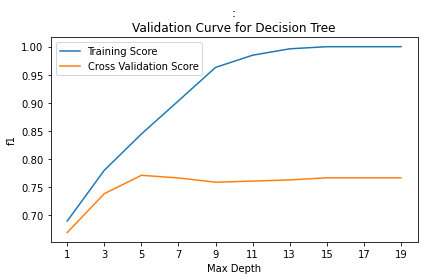

In [5]:
learner.plot_validation_curve(output_path, learner_name, True, scoring)

In [6]:
# grid search
param_grid = {param: params} 
best_params = learner.grid_search(clf, param_grid)
print(best_params)
#learner.learning_curve(DecisionTreeClassifier(**dt_best_params), dt_output_path, scoring)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_depth': 5}


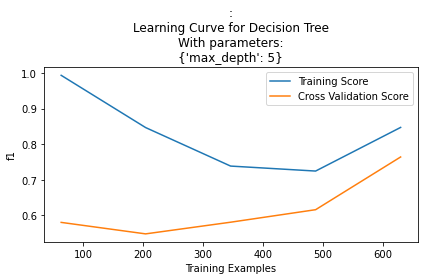

In [7]:
learner.learning_curve(CLF(**best_params), output_path, scoring=scoring)
learner.plot_learning_curve(output_path, f"{learner_name}\nWith parameters:\n{best_params}", True, scoring)

In [8]:
clf = MLPClassifier(hidden_layer_sizes=[96, 96], max_iter=750, early_stopping=True)
clf, training_time = learner.train(clf)
print(training_time)

0.17500829696655273


In [9]:
learner.cross_validate(clf, scoring=scoring)

0.7299809468919977